In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import openweathermapy.core as ow
from citipy import citipy

In [6]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=15.000, high=90.000, size=2500)
lngs = np.random.uniform(low=-135.000, high=0.000, size=2500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    

    if city not in cities:
        cities.append(city)

len(cities)

603

In [7]:
lat_lngs

In [8]:
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
settings = {"units": "Imperial", "appid": api_key}



In [9]:
city_weather_df = pd.DataFrame({"city": cities})
city_weather_df['lat'] = ""
city_weather_df['temp'] = ""
city_weather_df['humidity'] = ""
city_weather_df['cloudiness'] = ""
city_weather_df['winds'] = ""

In [10]:
city = []
for index, row in city_weather_df.iterrows():
    try:
        current_weather = ow.get_current(row['city'], **settings)
        city_weather_df.set_value(index,'lat',current_weather['coord']['lat'])
        city_weather_df.set_value(index,'temp',current_weather['main']['temp'])
        city_weather_df.set_value(index,'humidity',current_weather['main']['humidity'])
        city_weather_df.set_value(index,'cloudiness',current_weather['clouds']['all'])
        city_weather_df.set_value(index,'winds',current_weather['wind']['speed'])
        city.append(row['city'])
        print('--', end=' ')
    except:
        print(row['city'], end = ' ')

-- -- -- -- -- -- -- -- -- -- illoqqortoormiut -- -- -- -- -- -- -- -- -- -- attawapiskat -- -- olafsvik -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- bolungarvik -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- louisbourg -- -- cockburn harbour -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- bababe -- -- -- -- -- barentsburg -- nara -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- emilio carranza -- -- -- -- -- -- -- -- -- sorvag -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- fort saint john -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- ochiltree -- -- -- -- -- -- tombouctou -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- yetholm -- -- -- -- -- -- -- -- -- -- -- blackford longlac -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- moose factory -- -- -- --

In [11]:
#only keep data that we found values
city_weather_df = city_weather_df[city_weather_df['city'].isin(city)]

In [12]:
city_weather_df.head(10)

,city,lat,temp,humidity,cloudiness,winds
0,horta,38.53,67.35,95,0,14.9
1,hay river,60.82,17.6,100,20,2.24
2,tulum,20.22,71.89,97,92,4.09
3,lompoc,34.64,47.12,49,1,8.05
4,guerrero negro,27.98,60.96,55,8,13.27
5,isabela,10.2,80.94,95,64,4.09
6,cockburn town,21.46,80.08,98,12,22.17
7,clyde river,70.47,10.4,85,90,16.11
8,thompson,55.74,-4.01,83,90,4.7
9,chapais,49.78,5,77,90,17.22


In [14]:
url="http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
for city in city:
    target_url=url+"appid="+api_key+"&q"+city.replace(" ","+")+"&units="+units
    print(target_url)

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&qc&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&ql&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&qe&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&qa&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&qr&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&qw&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&qa&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&qt&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&qe&units=imperial
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196

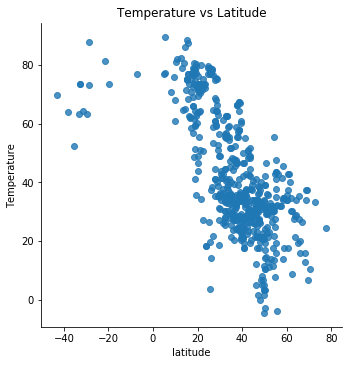

In [15]:
sns.lmplot(x='lat',y='temp', data=city_weather_df, fit_reg=False)
plt.title('Temperature vs Latitude')
plt.xlabel('latitude')
plt.ylabel('Temperature')
plt.show()

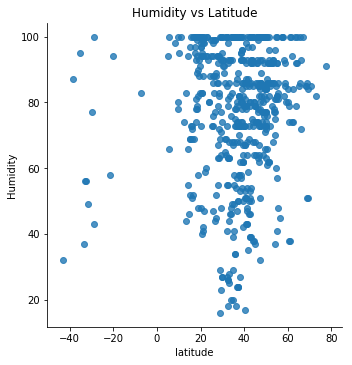

In [16]:
sns.lmplot(x='lat',y='humidity', data=city_weather_df, fit_reg=False)
plt.title('Humidity vs Latitude')
plt.xlabel('latitude')
plt.ylabel('Humidity')
plt.show()

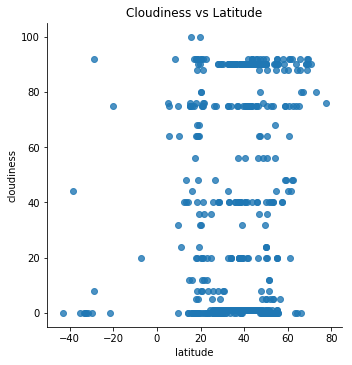

In [17]:
sns.lmplot(x='lat',y='cloudiness', data=city_weather_df, fit_reg=False)
plt.title('Cloudiness vs Latitude')
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.show()

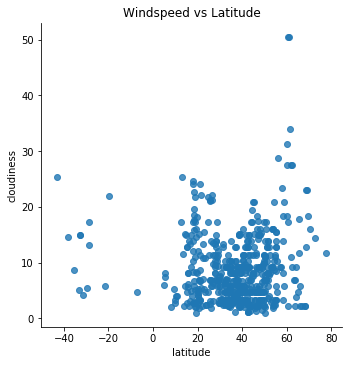

In [18]:
sns.lmplot(x='lat',y='winds', data=city_weather_df, fit_reg=False)
plt.title('Windspeed vs Latitude')
plt.xlabel('latitude')
plt.ylabel('cloudiness')
plt.show()

In [ ]:
Tempreature gets high when we go closer to the equatorial (0 lat) and can reach 80+ temp. it goes down when we get farther either south or north
humidity seems to be high closer to equatorial
Cloudiness and windspeed seem to be lower closer to equatorial comapred to other lats.